<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_07_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils

# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks


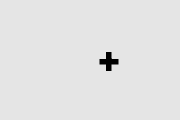

In [ ]:
### 1-1a: 画像の読込と表示（このセルの中身は触らなくて良い）
img1 = imutils.url_to_image('https://bit.ly/3gqDW32', cv2.IMREAD_GRAYSCALE)

# 読み込めなかった場合の例外処理
if img1 is None:
  print('Image file not found.')

template = imutils.url_to_image('https://bit.ly/3tYCJTI', cv2.IMREAD_GRAYSCALE)

# 読み込めなかった場合の例外処理
if template is None:
  print('Image file not found.')

# 画像を表示
cv2_imshow(img1)
cv2_imshow(template)

粗探索結果


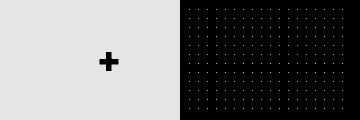

密探索結果


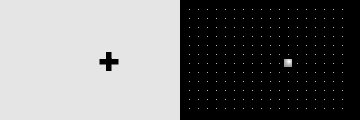

In [ ]:
### 課題7 テンプレートマッチング（粗密探索法によるテンプレートマッチングの高速化）

# 準備
rows1, cols1 = img1.shape # 入力画像の大きさ取得
rowst, colst = template.shape # テンプレート画像の大きさ取得
sim_img_ncc = np.zeros((rows1, cols1), np.uint16) # 類似度（正規化相互相関）表示のための黒い画像を用意
skiprows = int(rowst/2) # 粗探索のrow方向の飛ばし幅を設定（初期値はテンプレートのrow幅の半分）
skipcols = int(colst/2) # 粗探索のrow方向の飛ばし幅を設定（初期値はテンプレートのcol幅の半分）
th = int(255 * 0.8) # 怪しい場所を検出する閾値（初期値は255の0.8倍）
check_point = [] # 怪しい場所を記録するための配列を用意

# 正規化相互相関計算のためにテンプレートの2乗和を計算
sum_t = 0
for k in range (0, rowst):
  for l in range (0, colst):
       sum_t += int(template[k][l])**2

# 入力画像をラスタ走査し，各画素位置における正規化相互相関を計算
for i in range (0, rows1 - rowst + 1, skiprows):
  for j in range (0, cols1 - colst + 1, skipcols):
    sim_cc = 0
    sum_i = 0
    # テンプレートと重複する範囲内のラスタ走査
    for k in range (0, rowst):
      for l in range (0, colst):
        sim_cc += int(template[k][l]) * int(img1[i+k][j+l])
        sum_i += int(img1[i+k][j+l])**2
    if ( sum_i == 0 ):
      sim_img_ncc[i+int(rowst/2)][j+int(colst/2)] = 0
    else: 
      sim_img_ncc[i+int(rowst/2)][j+int(colst/2)] = int(255 * sim_cc / np.sqrt(sum_t) / np.sqrt(sum_i))

    # 怪しい場所を検出し，配列に座標を追記
    if sim_img_ncc[i+int(rowst/2)][j+int(colst/2)] > th:
      check_point.append([i,j])

print("粗探索結果")
figure = np.hstack((img1, sim_img_ncc))
cv2_imshow(figure)    


# 各々の怪しい場所周辺（縦横方向の各々飛ばし幅の±半分の範囲）を再調査
skiprows = int(skiprows/2) # 飛ばし幅を半分に更新
skipcols = int(skipcols/2) # 飛ばし幅を半分に更新
for check_point_x, check_point_y in check_point: #各チェックポイントごと
  for i in range(check_point_x-skiprows, check_point_x+skiprows): #飛ばし幅の±半分の範囲
    for j in range(check_point_y-skipcols, check_point_y+skipcols): #飛ばし幅の±半分の範囲
      sim_cc = 0
      sum_i = 0
      # テンプレートと重複する範囲内のラスタ走査
      for k in range (0, rowst):
        for l in range (0, colst):
          sim_cc += int(template[k][l]) * int(img1[i+k][j+l])
          sum_i += int(img1[i+k][j+l])**2
      if ( sum_i == 0 ):
        sim_img_ncc[i+int(rowst/2)][j+int(colst/2)] = 0
      else: 
        sim_img_ncc[i+int(rowst/2)][j+int(colst/2)] = int(255 * sim_cc / np.sqrt(sum_t) / np.sqrt(sum_i))







# 元画像と正規化相互相関の分布を並べて表示
print("密探索結果")
figure = np.hstack((img1, sim_img_ncc))
cv2_imshow(figure)    